# Spatiotemporal Energy Model
Acelson & Bergen 1984

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

## Spatial Filters: 1D

Text(0.5, 1.0, '1D Spatial Filter Quadrature Pairs')

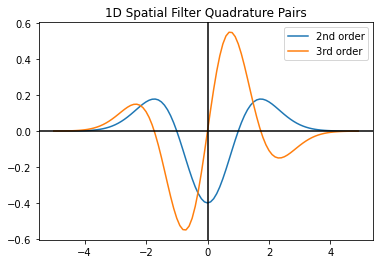

In [2]:
def spatial_filter_1d(x, order=2):
    if order == 2:
        #second derivative of gaussian
        response = (np.exp(-(x**2/2))*(-1+x)*(1+x))/np.sqrt(2*np.pi)
    elif order == 3:
        #third derivative of gaussian
        response = -(np.exp(-(x**2/2))*x*(-3+x**2))/np.sqrt(2*np.pi)
    else:
        print('Must be 2nd or 3rd order!')
        return
    return response
    
space = np.arange(-5,5,0.1)
response_1 = spatial_filter_1d(space, order=2)
response_2 = spatial_filter_1d(space, order=3)
plt.plot(space,response_1, label='2nd order')
plt.plot(space,response_2, label='3rd order')
plt.axhline(0,c='k')
plt.axvline(0,c='k')
plt.legend()
plt.title("1D Spatial Filter Quadrature Pairs")

## Spatial Filters: 2D
Todo: Specify Oriented Filter Equations

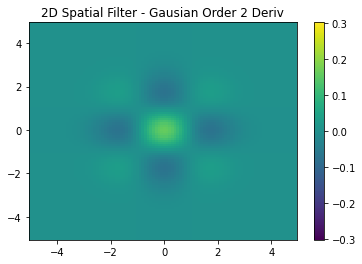

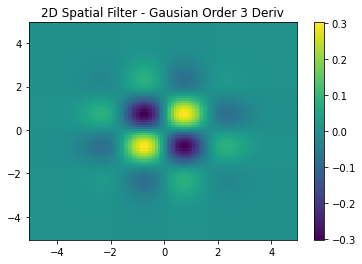

In [3]:
def spatial_filter_2d(x1, x2, order=2, oriented=False):
    if oriented:
        print('Oriented Not Yet Implmented')
        return
    else:
        if order == 2:
            #second derivative of gaussian
            x1_response = (np.exp(-(x1**2/2))*(-1+x1)*(1+x1))/np.sqrt(2*np.pi)
            x2_response = (np.exp(-(x2**2/2))*(-1+x2)*(1+x2))/np.sqrt(2*np.pi)
        elif order == 3:
            #third derivative of gaussian
            x1_response = -(np.exp(-(x1**2/2))*x1*(-3+x1**2))/np.sqrt(2*np.pi)
            x2_response = -(np.exp(-(x2**2/2))*x2*(-3+x2**2))/np.sqrt(2*np.pi)
        else:
            print('Must be 2nd or 3rd order!')
            return
            
    response = np.outer(x1_response, x2_response)
    return(response)

space_x = np.arange(-5,5,0.1)
space_y = np.arange(-5,5,0.1)
response_1 = spatial_filter_2d(space_x, space_y, order=2)
response_2 = spatial_filter_2d(space_x, space_y, order=3)
cmax=np.max((response_1,response_2))
cmin=np.min((response_1,response_2))
plt.pcolormesh(space_x, space_y, response_1, shading='auto', vmin=cmin, vmax=cmax)
plt.colorbar()
plt.title("2D Spatial Filter - Gausian Order 2 Deriv")
plt.show()
plt.pcolormesh(space_x, space_y, response_2, shading='auto', vmin=cmin, vmax=cmax)
plt.colorbar()
plt.title("2D Spatial Filter - Gausian Order 3 Deriv")
plt.show()

## Temporal Filters

Text(0.5, 1.0, 'Temporal Filter Quadrature Pairs')

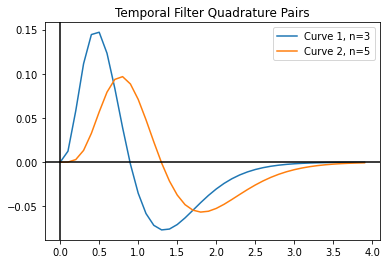

In [4]:
def temporal_filter(t, n=3, k=1):
    a = (k*t)**n
    b = np.exp(-k*t)
    c = (1/np.math.factorial(n))-((k*t)**2)/(np.math.factorial(n+2))
    return(a*b*c)

times = np.arange(0,4,0.1)
response_1 = temporal_filter(times, n=3, k=5)
response_2 = temporal_filter(times, n=5, k=5)
plt.plot(times,response_1, label='Curve 1, n=3')
plt.plot(times,response_2, label='Curve 2, n=5')
plt.axhline(0,c='k')
plt.axvline(0,c='k')
plt.legend()
plt.title("Temporal Filter Quadrature Pairs")

## Separable Spatiotemporal Filters

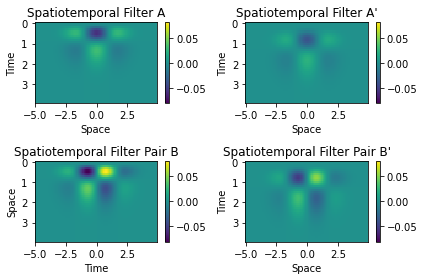

In [9]:

def spatiotemporal_filter(x,t, n=3, k=1, order=2):
    #spatial component
    if order == 2:
        #second derivative of gaussian
        spatial_response = (np.exp(-(x**2/2))*(-1+x)*(1+x))/np.sqrt(2*np.pi)
    elif order == 3:
        #third derivative of gaussian
        spatial_response = -(np.exp(-(x**2/2))*x*(-3+x**2))/np.sqrt(2*np.pi)
    else:
        print('Must be 2nd or 3rd order!')
    
    #temporal component
    a = (k*t)**n
    b = np.exp(-k*t)
    c = (1/np.math.factorial(n))-((k*t)**2)/(np.math.factorial(n+2))
    temporal_response = a*b*c

    #combine two
    response = spatial_response * temporal_response
    
    return response


space = np.arange(-5,5,0.1)
times = np.arange(0,4,0.1)
s,t = np.meshgrid(space,times)

#create responses
st_response_a = spatiotemporal_filter(s,t, n=3, k=5, order=2).T
st_response_b = spatiotemporal_filter(s,t, n=3, k=5, order=3).T
st_response_apr = spatiotemporal_filter(s,t, n=5, k=5, order=2).T
st_response_bpr = spatiotemporal_filter(s,t, n=5, k=5, order=3).T
rmin = np.min((st_response_a, st_response_b, st_response_apr, st_response_bpr))
rmax = np.max((st_response_a, st_response_b, st_response_apr, st_response_bpr))
norm = mpl.colors.Normalize(vmin=rmin, vmax=rmax)


#plot
plt.subplot(2,2,1)
plt.pcolormesh(space,times,st_response_a.T, norm=norm, shading='auto')
#plt.pcolormesh(times,space,st_response_1a, norm=norm, shading='auto')
plt.gca().invert_yaxis()
plt.ylabel('Time')
plt.xlabel('Space')
plt.colorbar()
plt.title("Spatiotemporal Filter A")

plt.subplot(2,2,2)
plt.pcolormesh(space,times,st_response_apr.T, norm=norm, shading='auto')
#plt.pcolormesh(times,space,st_response_1b, norm=norm, shading='auto')
plt.gca().invert_yaxis()
plt.ylabel('Time')
plt.xlabel('Space')
plt.colorbar()
plt.title("Spatiotemporal Filter A'")

plt.subplot(2,2,3)
#plt.pcolormesh(times,space,st_response_2b, norm=norm, shading='auto')
plt.pcolormesh(space,times,st_response_b.T, norm=norm, shading='auto')
plt.gca().invert_yaxis()
plt.ylabel('Space')
plt.xlabel('Time')
plt.colorbar()
plt.title("Spatiotemporal Filter Pair B")
plt.tight_layout()

plt.subplot(2,2,4)
plt.pcolormesh(space,times,st_response_bpr.T, norm=norm, shading='auto')
#plt.pcolormesh(times,space,st_response_2a, norm=norm, shading='auto')
plt.gca().invert_yaxis()
plt.ylabel('Time')
plt.xlabel('Space')
plt.colorbar()
plt.title("Spatiotemporal Filter Pair B'")

plt.tight_layout()
plt.show()


**Note**:
What could these filters be sensitive to? Certainly a flashing stimulus, but also what kind of motion? For the top filter, something that appears dark in the middle and then moves at the speed such that it ends up at 2 or -2 at t=1.5 seconds. The top filter can detect this, but has ambiguity about motion direction. The bottom filter (spatial quaderature pair) has spatial asymmetry such that this ambiguity is broken, and with the two filters responses combined, both the speed and direction can be recovered.

## Combining Spatiotemporal Separable Filteres to create Spatiotemporally Oriented Filters

The next step in the spatiotemporal energy model is to combine these separable spatiotemporal filters to create oriented linear responses.

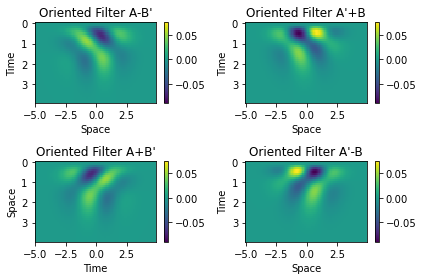

In [19]:
a_minus_bp = st_response_a - st_response_bpr
ap_plus_b = st_response_apr + st_response_b
a_plus_bp = st_response_a + st_response_bpr
ap_minus_b = st_response_apr - st_response_b

rmin = np.min((a_minus_bp, ap_plus_b, a_plus_bp, ap_minus_b))
rmax = np.max((a_minus_bp, ap_plus_b, a_plus_bp, ap_minus_b))
norm = mpl.colors.Normalize(vmin=rmin, vmax=rmax)

#plot
plt.subplot(2,2,1)
plt.pcolormesh(space,times,a_minus_bp.T, norm=norm, shading='auto')
plt.gca().invert_yaxis()
plt.ylabel('Time')
plt.xlabel('Space')
plt.colorbar()
plt.title("Oriented Filter A-B'")

plt.subplot(2,2,2)
plt.pcolormesh(space,times,ap_plus_b.T, norm=norm, shading='auto')
plt.gca().invert_yaxis()
plt.ylabel('Time')
plt.xlabel('Space')
plt.colorbar()
plt.title("Oriented Filter A'+B")
plt.tight_layout()


plt.subplot(2,2,3)
plt.pcolormesh(space,times,a_plus_bp.T, norm=norm, shading='auto')
plt.gca().invert_yaxis()
plt.ylabel('Space')
plt.xlabel('Time')
plt.colorbar()
plt.title("Oriented Filter A+B'")
plt.tight_layout()

plt.subplot(2,2,4)
plt.pcolormesh(space,times,ap_minus_b.T, norm=norm, shading='auto')
plt.gca().invert_yaxis()
plt.ylabel('Time')
plt.xlabel('Space')
plt.colorbar()
plt.title("Oriented Filter A'-B")

plt.show()

## Oriented Energy Filters
We now square each of these filters, and sum to create two oriented Energy Filters

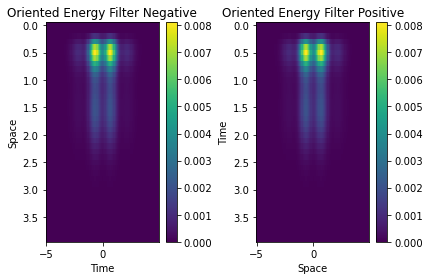

In [20]:
oriented_energy_n = (a_minus_bp**2) + (ap_plus_b**2)
oriented_energy_p = (a_plus_bp**2) + (ap_minus_b**2)

rmin = np.min((oriented_energy_n, oriented_energy_p))
rmax = np.max((oriented_energy_n, oriented_energy_p))
norm = mpl.colors.Normalize(vmin=rmin, vmax=rmax)

plt.subplot(1,2,1)
plt.pcolormesh(space,times,oriented_energy_n.T, norm=norm, shading='auto')
plt.gca().invert_yaxis()
plt.ylabel('Space')
plt.xlabel('Time')
plt.colorbar()
plt.title("Oriented Energy Filter Negative")
plt.tight_layout()

plt.subplot(1,2,2)
plt.pcolormesh(space,times,oriented_energy_p.T, norm=norm, shading='auto')
plt.gca().invert_yaxis()
plt.ylabel('Time')
plt.xlabel('Space')
plt.colorbar()
plt.title("Oriented Energy Filter Positive")

plt.tight_layout()
plt.show()


**Note**: These don't look oriented - and they look identical... Why is that?

## Opponent Energy Filters
The final step is the combine the two oriented Energy Filters to create the opponent energy filter

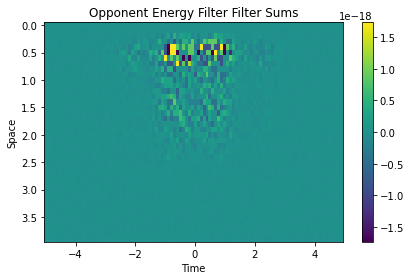

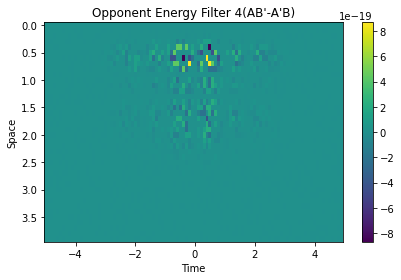

In [18]:
opponent_energy = oriented_energy_p - oriented_energy_n
opponent_energy_equiv = 4*((st_response_a*st_response_bpr) - (st_response_apr*st_response_b))

plt.pcolormesh(space,times,opponent_energy.T, shading='auto')
plt.gca().invert_yaxis()
plt.ylabel('Space')
plt.xlabel('Time')
plt.colorbar()
plt.title("Opponent Energy Filter Filter Sums")
plt.tight_layout()

plt.show()

plt.pcolormesh(space,times,opponent_energy_equiv.T, shading='auto')
plt.gca().invert_yaxis()
plt.ylabel('Space')
plt.xlabel('Time')
plt.colorbar()
plt.title("Opponent Energy Filter 4(AB'-A'B)")
plt.tight_layout()

plt.show()

**Note:** These are essentially identical up to numerical error (1e-19). So the algebra is correct but seems something about the separable responses (A,A',B,B') may be off.. 